In [1]:
## Time-series prediction of software threat using Long Short-Term Memory (LSTM)
## Dataset
## Source provided by Shaq Tardif, Vikram Gnanaraj Vijayakumar, 
## Venkata Sai Prakash Polisetty, Mini Kusum Paudel,
## and Alisha Shah

import random
# Import the tabulate library
from tabulate import tabulate
random.seed(42)
# Initialize day with 1st day
Day = 1

# Define headers for the table
headers = ["Day", "Phishing", "Ransomware", "DDOS", "Malware", "SW Threat"]

# Create an empty list to hold the rows of data
rows = []

#initialize old SW Threat
software_threat_old = 0

# Loop for 365 days
for i in range(365): 
    # Generate a random number of attacks for each type
    phishing = random.randint(1, 50)
    ransomware = random.randint(1, 50)
    ddos = random.randint(1, 50)
    malware = random.randint(1, 50)
    software_threat_new = 0.444*phishing + 0.333*ransomware + 0.222*ddos + 0.123*malware
    SW_Threat_Total = software_threat_new + software_threat_old
    software_threat_old = SW_Threat_Total
    
    # Add the data for this day to the rows list
    rows.append([Day, phishing, ransomware, ddos, malware, SW_Threat_Total])
    
    # Move on to the next day 
    Day += 1

# Define the table format with borders
table_format = "orgtbl"

# Print the table
#print(tabulate(rows, headers=headers, tablefmt=table_format))
print(tabulate(rows, headers=headers, tablefmt=table_format))

|   Day |   Phishing |   Ransomware |   DDOS |   Malware |   SW Threat |
|-------+------------+--------------+--------+-----------+-------------|
|     1 |         41 |            8 |      2 |        48 |      27.216 |
|     2 |         18 |           16 |     15 |         9 |      44.973 |
|     3 |         48 |            7 |     44 |        48 |      84.288 |
|     4 |         35 |            6 |     38 |        28 |     113.706 |
|     5 |          3 |            2 |      6 |        14 |     118.758 |
|     6 |         15 |           33 |     39 |         2 |     145.311 |
|     7 |         36 |           13 |     46 |        42 |     181.002 |
|     8 |         45 |           35 |     27 |        15 |     220.476 |
|     9 |         29 |           38 |     18 |         1 |     250.125 |
|    10 |         49 |           11 |     45 |        28 |     288.978 |
|    11 |         22 |           18 |     10 |        14 |     308.682 |
|    12 |         49 |           22 |      7 |     

In [2]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.DataFrame(rows, columns=headers)

In [4]:
df.head()

,Day,Phishing,Ransomware,DDOS,Malware,SW Threat
0,1,41,8,2,48,27.216
1,2,18,16,15,9,44.973
2,3,48,7,44,48,84.288
3,4,35,6,38,28,113.706
4,5,3,2,6,14,118.758


In [5]:
df.index=df['Day']
df.head()

,Day,Phishing,Ransomware,DDOS,Malware,SW Threat
Day,,,,,,
1,1,41,8,2,48,27.216
2,2,18,16,15,9,44.973
3,3,48,7,44,48,84.288
4,4,35,6,38,28,113.706
5,5,3,2,6,14,118.758


In [6]:
df = df.drop('Day', axis=1)

In [7]:
df.head()

,Phishing,Ransomware,DDOS,Malware,SW Threat
Day,,,,,
1,41,8,2,48,27.216
2,18,16,15,9,44.973
3,48,7,44,48,84.288
4,35,6,38,28,113.706
5,3,2,6,14,118.758


In [8]:
## using univariate feature(Only temperature for given time)

uni_data = df['SW Threat']
uni_data.head()

Day
1     27.216
2     44.973
3     84.288
4    113.706
5    118.758
Name: SW Threat, dtype: float64

<Axes: xlabel='Day'>

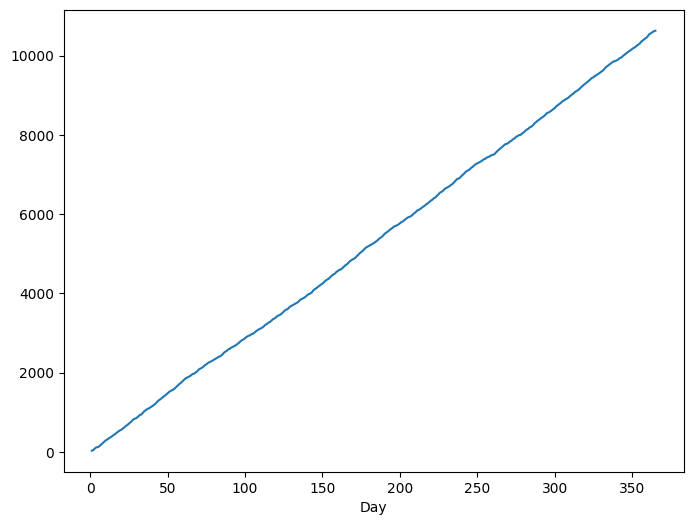

In [9]:
uni_data.plot()

In [10]:
uni_data = uni_data.values

In [11]:
0.7*375,0.1*375

(262.5, 37.5)

In [12]:
## train test split for simple time series moving window average
train_split = int(0.7*375)
tf.random.set_seed(13)

### standardize data
uni_data_mean = uni_data[:train_split].mean()
uni_data_std = uni_data[:train_split].std()
uni_data  = (uni_data - uni_data_mean)/ uni_data_std

print(type(uni_data))


<class 'numpy.ndarray'>


In [13]:
valupto=train_split+int(0.11*375)
valupto,0.7*375

(303, 262.5)

In [14]:
## utility functions

## funtion to create data for univariate forecasting

def univariate_data(dataset, start_idx , end_idx , history_size, target_size):
  data = []
  labels = []
  start_idx  = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx):
    idxs = range(i-history_size , i)
    data.append(np.reshape(dataset[idxs] , (history_size, 1))) ### reshape data
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

uni_data_history = 20   ## last 20 values
uni_data_future = 0     ## future data

x_train_uni , y_train_uni = univariate_data(uni_data , 0 , train_split , uni_data_history , uni_data_future)

x_val_uni , y_val_uni = univariate_data(uni_data , train_split , valupto ,uni_data_history , uni_data_future)
x_test_uni,y_test_uni=univariate_data(uni_data , valupto , None ,uni_data_history , uni_data_future)

In [15]:
print(x_train_uni.shape , y_train_uni.shape)
print(x_val_uni.shape , y_val_uni.shape)
print(x_test_uni.shape,y_test_uni.shape)

(242, 20, 1) (242,)
(21, 20, 1) (21,)
(42, 20, 1) (42,)


In [16]:
print('Single window of history data' , x_train_uni[0])

print('Target Temperature to predict ' , y_train_uni[0])

Single window of history data [[-1.72010134]
 [-1.71197223]
 [-1.69397391]
 [-1.68050642]
 [-1.67819363]
 [-1.66603773]
 [-1.64969847]
 [-1.63162736]
 [-1.61805412]
 [-1.60026731]
 [-1.59124686]
 [-1.57688392]
 [-1.56710261]
 [-1.55363237]
 [-1.5399781 ]
 [-1.52903079]
 [-1.51274921]
 [-1.49991073]
 [-1.48697062]
 [-1.47930022]]
Target Temperature to predict  -1.4638935010450616


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

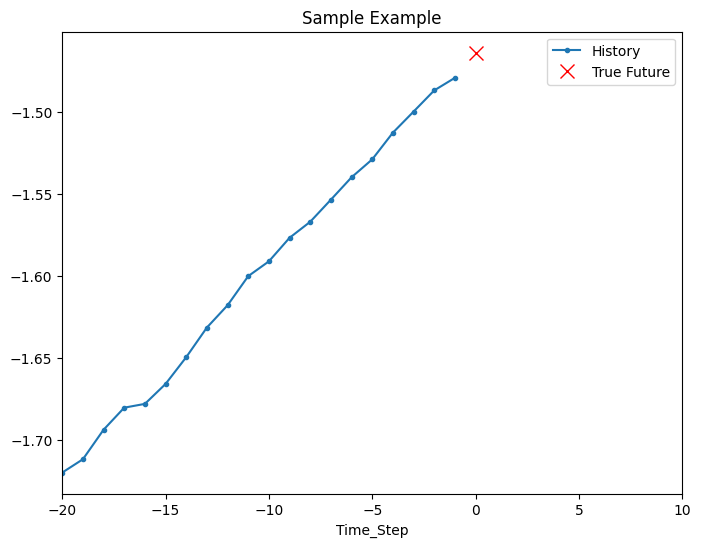

In [17]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step')
  return plt

plot_time_series([x_train_uni[0] , y_train_uni[0]] , 0 , 'Sample Example')
     

In [18]:
## prepare tensorflow dataset
np.random.seed(42)
random.seed(42)
batch_size = 256
buffer_size = 10000

train_uni = tf.data.Dataset.from_tensor_slices((x_train_uni , y_train_uni))
train_uni = train_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_uni = tf.data.Dataset.from_tensor_slices((x_val_uni , y_val_uni))
val_uni = val_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_uni)
print(val_uni)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [19]:
## Define LSTM model 
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(64 , input_shape = x_train_uni.shape[-2:]), tf.keras.layers.Dense(32),
                                         tf.keras.layers.Dense(1)])

lstm_model.compile(optimizer = 'adam', loss = 'mae')

steps = 50

EPOCHS =100

history=lstm_model.fit(train_uni , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_uni, validation_steps = 50)


Epoch 1/100
50/50 [==============================] - 5s 48ms/step - loss: 0.1490 - val_loss: 0.1310
Epoch 2/100
50/50 [==============================] - 2s 38ms/step - loss: 0.0087 - val_loss: 0.0465
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 0.0055 - val_loss: 0.0539
Epoch 4/100
50/50 [==============================] - 3s 62ms/step - loss: 0.0054 - val_loss: 0.0506
Epoch 5/100
50/50 [==============================] - 4s 76ms/step - loss: 0.0054 - val_loss: 0.0505
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 0.0052 - val_loss: 0.0423
Epoch 7/100
50/50 [==============================] - 2s 39ms/step - loss: 0.0053 - val_loss: 0.0428
Epoch 8/100
50/50 [==============================] - 2s 39ms/step - loss: 0.0054 - val_loss: 0.0480
Epoch 9/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0052 - val_loss: 0.0475
Epoch 10/100
50/50 [==============================] - 2s 47ms/step - loss: 0.0052 - val_loss: 0.0370

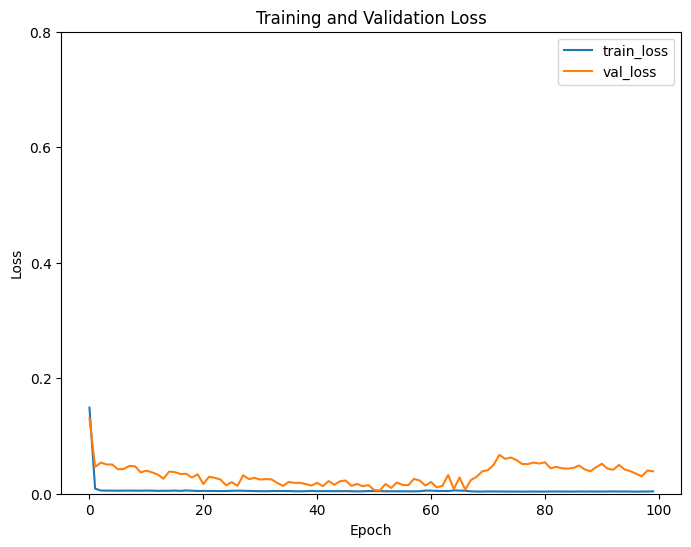

In [25]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.ylim([0, 0.4])
plt.yticks([i/5 for i in range(0, 5)])
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

1/1 [==============================] - 1s 547ms/step


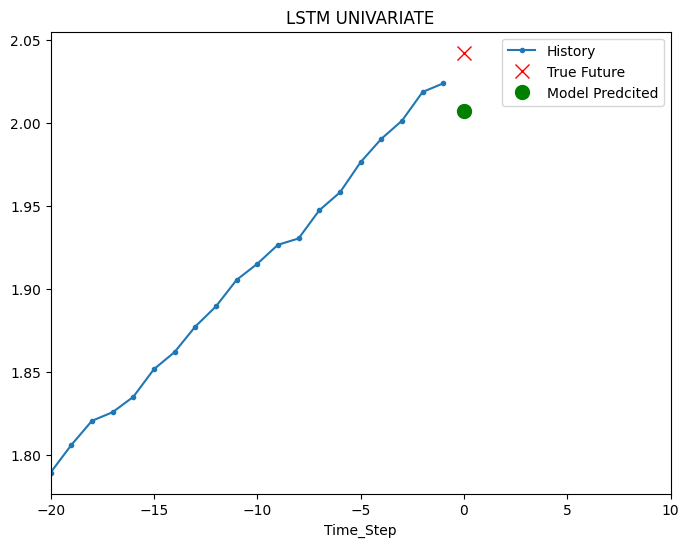

1/1 [==============================] - 0s 25ms/step


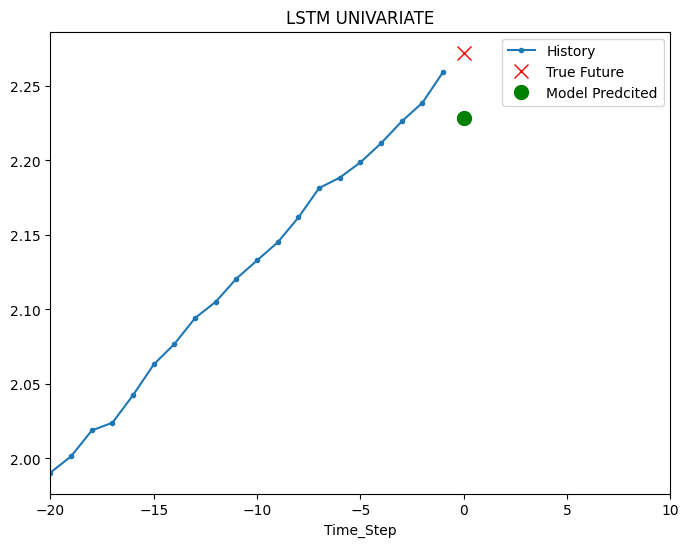

1/1 [==============================] - 0s 25ms/step


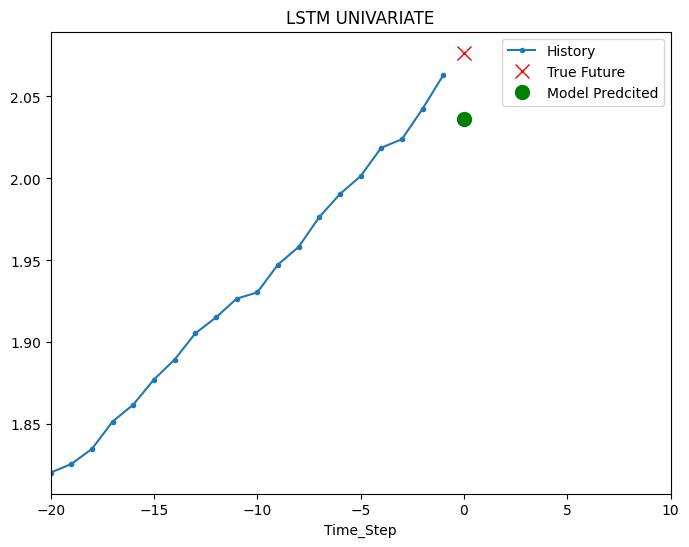

1/1 [==============================] - 0s 25ms/step


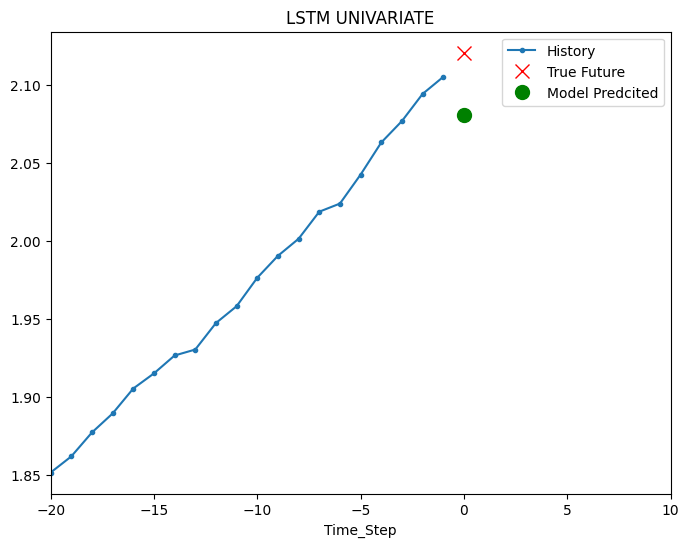

1/1 [==============================] - 0s 30ms/step


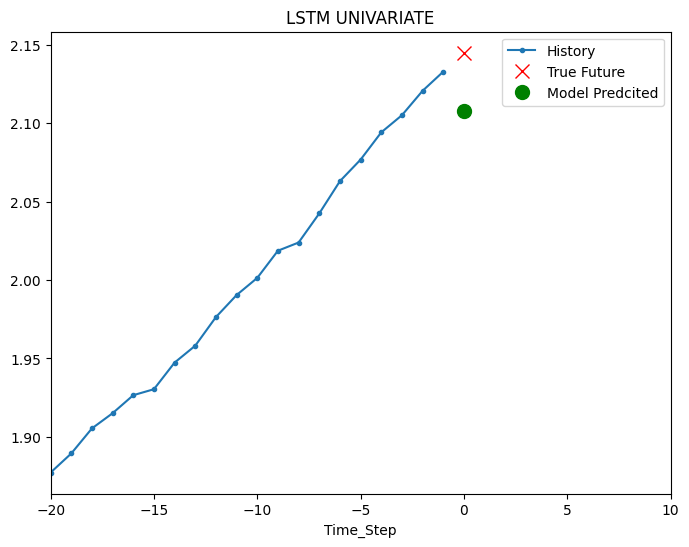

In [ ]:
for i , j in val_uni.take(5):
  plot = plot_time_series([i[0].numpy() , j[0].numpy() , lstm_model.predict(i)[0]] ,0 , 'LSTM UNIVARIATE')
  plot.show()

In [ ]:
prediction=lstm_model.predict(x_test_uni)

2/2 [==============================] - 1s 8ms/step


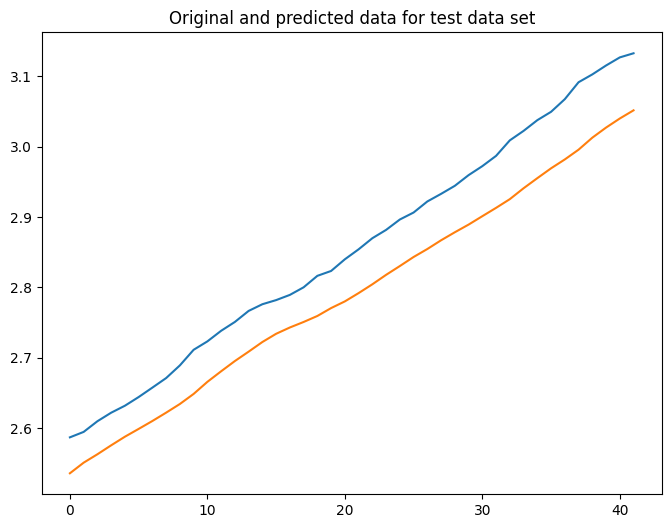

In [ ]:
plt.plot(y_test_uni,label="Original test data")
plt.plot(prediction,label="prediction")
plt.title('Original and predicted data for test data set')
plt.show()

In [ ]:
rmse=tf.keras.metrics.RootMeanSquaredError()
TotalErrorInPrediction=rmse(y_test_uni,prediction)
TotalErrorInPrediction

<tf.Tensor: shape=(), dtype=float32, numpy=0.06530773>

In [ ]:
xx,yy=univariate_data(uni_data, 0 ,364, uni_data_history , uni_data_future)
xx.shape,yy.shape

((344, 20, 1), (344,))

In [ ]:
## prepare tensorflow dataset
batch_size = 256
buffer_size = 10000

train_unid = tf.data.Dataset.from_tensor_slices((xx , yy))
train_unid = train_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()
print(train_unid)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))>


In [ ]:
totprediction=lstm_model.predict(xx)

11/11 [==============================] - 0s 5ms/step


In [ ]:
sse = np.sum((uni_data - totprediction) ** 2)

# Print the MAE
print("SSe Squared Error:", sse)

SSe Squared Error: 462309.14866535977


In [ ]:
### standardize data
dataset = df.values

data_mean = dataset[:train_split].mean(axis =0)

data_std = dataset[:train_split].std(axis = 0)

dataset = (dataset - data_mean)/data_std

In [ ]:
### create mutlivariate data

def mutlivariate_data(dataset , target , start_idx , end_idx , history_size , target_size,
                      step ,  single_step = False):
  data = []
  labels = []
  start_idx = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx ):
    idxs = range(i-history_size, i, step) ### using step
    data.append(dataset[idxs])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data) , np.array(labels)


In [ ]:
365-valupto,valupto-train_split

(62, 41)

In [ ]:
### generate multivariate data

history = 20
future_target = 30
STEP = 2

x_train_ss , y_train_ss = mutlivariate_data(dataset , dataset[:, 4], 0, train_split, history,
                                            future_target, STEP , single_step = True)

x_val_ss , y_val_ss = mutlivariate_data(dataset , dataset[:,4] , train_split , valupto , history ,
                                        future_target, STEP, single_step = True)
x_test_ss , y_test_ss = mutlivariate_data(dataset , dataset[:,4] , valupto , None , history ,
                                        future_target, STEP, single_step = True)


print(x_train_ss.shape , y_train_ss.shape, x_test_ss.shape , y_test_ss.shape)

(242, 10, 5) (242,) (12, 10, 5) (12,)


In [ ]:
## tensorflow dataset

train_ss = tf.data.Dataset.from_tensor_slices((x_train_ss, y_train_ss))
train_ss = train_ss.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_ss = tf.data.Dataset.from_tensor_slices((x_val_ss, y_val_ss))
val_ss = val_ss.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_ss)
print(val_ss)


<_RepeatDataset element_spec=(TensorSpec(shape=(None, 10, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 10, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
### Modelling using LSTM
## prepare tensorflow dataset
np.random.seed(42)
random.seed(42)
single_step_model = tf.keras.models.Sequential()
from tensorflow.keras import regularizers
single_step_model.add(tf.keras.layers.LSTM(16, input_shape = (10,5),kernel_regularizer=regularizers.l2(0.01)))
single_step_model.add(tf.keras.layers.Dense(8))
single_step_model.add(tf.keras.layers.Dense(4))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mae')
single_step_model_history = single_step_model.fit(train_ss, epochs = 300 , 
        steps_per_epoch =50, validation_data = val_ss, validation_steps = 50)

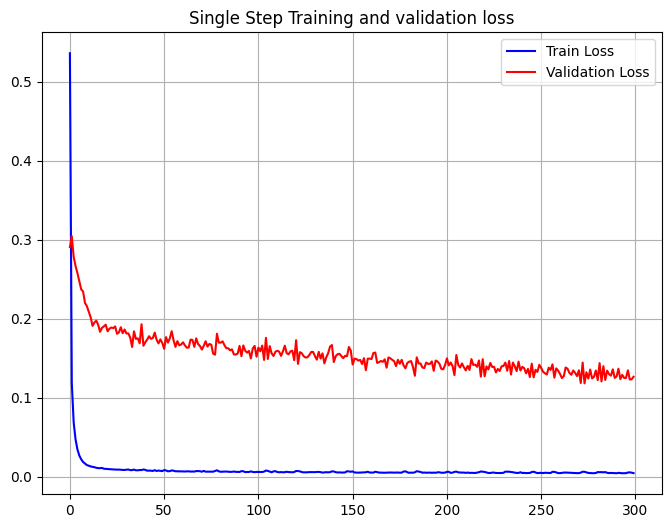

In [ ]:
## plot train test loss 

def plot_loss(history , title):
  loss = single_step_model_history.history['loss']
  val_loss = single_step_model_history.history['val_loss']

  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss , 'b' , label = 'Train Loss')
  plt.plot(epochs, val_loss , 'r' , label = 'Validation Loss')
  plt.title(title)
  plt.legend()
  plt.grid()
  plt.show()

plot_loss(single_step_model_history , 'Single step Training and validation loss')

1/1 [==============================] - 1s 713ms/step


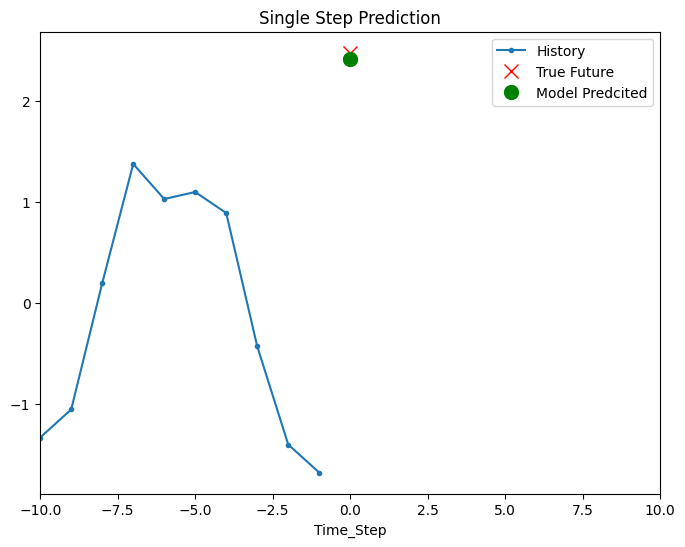

1/1 [==============================] - 0s 47ms/step


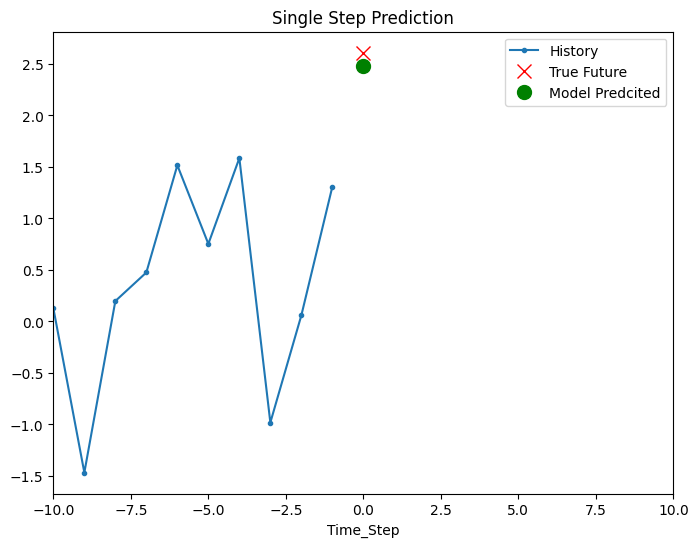

1/1 [==============================] - 0s 25ms/step


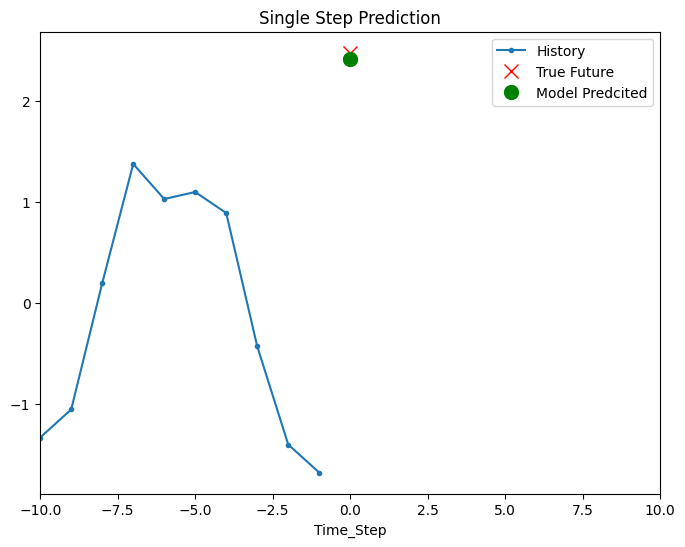

1/1 [==============================] - 0s 24ms/step


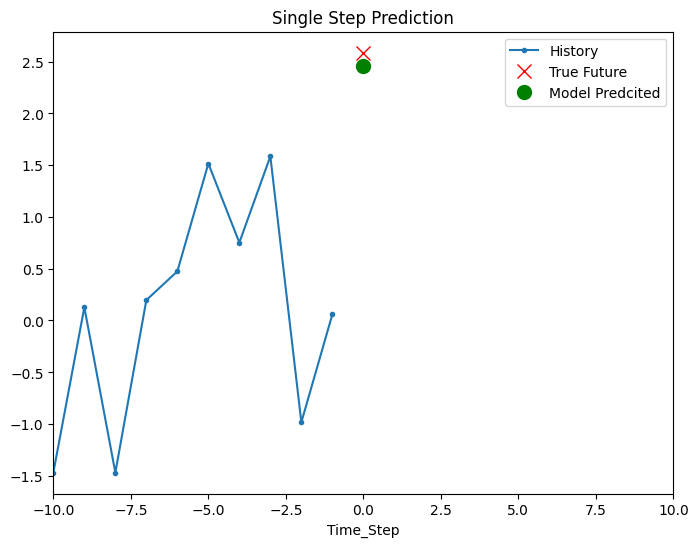

1/1 [==============================] - 0s 25ms/step


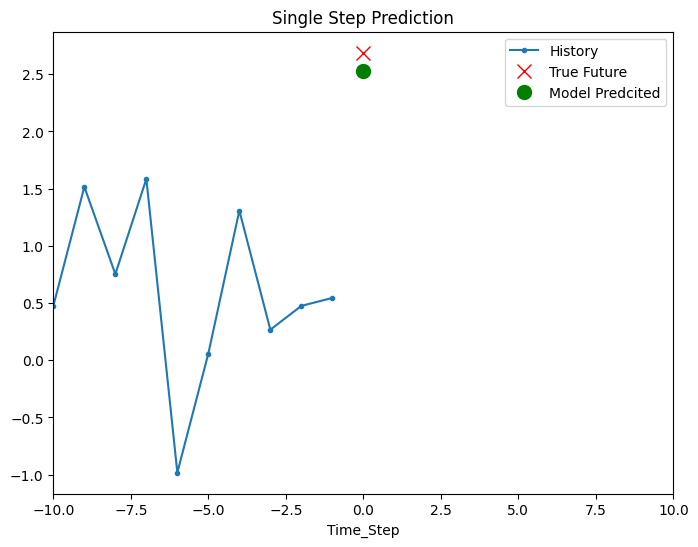

In [ ]:
# plot time series and predicted values

for x, y in val_ss.take(5):
  plot = plot_time_series([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]],0,
                   'Single Step Prediction')
  plot.show()

In [ ]:
predictionn=single_step_model.predict(x_test_ss)

1/1 [==============================] - 1s 518ms/step


In [ ]:
rmse=tf.keras.metrics.RootMeanSquaredError()
TotalError=rmse(y_test_ss,predictionn)
TotalError

<tf.Tensor: shape=(), dtype=float32, numpy=0.20406714>

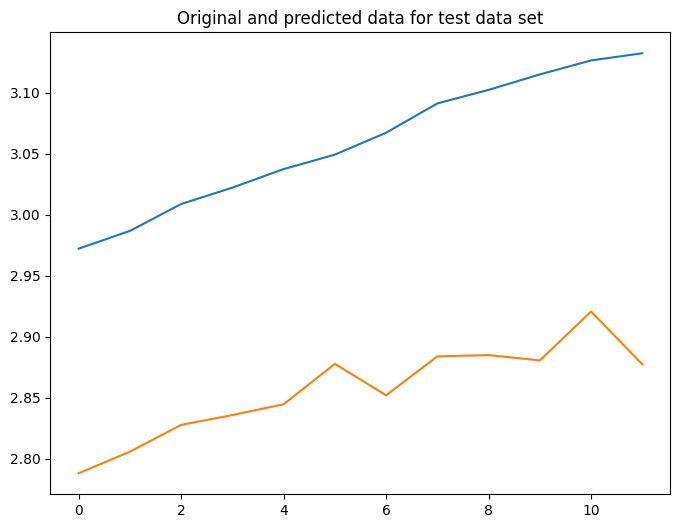

In [ ]:
plt.plot(y_test_ss,label="Original test data")
plt.plot(predictionn,label="prediction")
plt.title('Original and predicted data for test data set')
plt.show()

In [ ]:
xxx,yyy=mutlivariate_data(dataset, dataset[:, 4], 0,
                                                 364, history,
                                                 future_target, STEP)
xxx.shape,yyy.shape

<ipython-input-37-7be9920fc3f7>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data) , np.array(labels)


((344, 10, 5), (344,))

In [ ]:
totalprediction=single_step_model.predict(xxx)

11/11 [==============================] - 0s 4ms/step


In [ ]:
sse = np.sum((dataset[:,4] - totalprediction) ** 2)

# Print the MAE
print("SSe Squared Error:", sse)

SSe Squared Error: 474175.63179652544


In [ ]:
future_target = 30 # 30 future values
x_train_multi, y_train_multi = mutlivariate_data(dataset, dataset[:, 4], 0,
                                                 train_split, history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = mutlivariate_data(dataset, dataset[:, 4],
                                             train_split, valupto, history,
                                             future_target, STEP)
x_test_multi, y_test_multi = mutlivariate_data(dataset, dataset[:, 4],
                                             valupto,None, history,
                                             future_target, STEP)


print(x_train_multi.shape)
print(y_train_multi.shape)
print(x_val_multi.shape, y_val_multi.shape)
     

(222, 20, 5)
(222, 30)
(1, 20, 5) (1, 30)


In [ ]:
# TF DATASET

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(batch_size).repeat()

In [ ]:
print(train_data_multi)
print(val_data_multi)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, 30), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, 30), dtype=tf.float64, name=None))>


In [ ]:
#plotting function
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  plt.grid()
  plt.plot(num_in, np.array(history[:, 4]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()
  


#for x, y in train_data_multi.take(1):
  #multi_step_plot(x[0], y[0], np.array([0]))
     